In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

In [2]:
# Constants
IMG1_PATH = 'left.JPG'
IMG2_PATH = 'right.JPG'

IMG_CROP_START_X = 1250
IMG_CROP_START_Y = 1650
IMG_CROP_WIDTH = 800
IMG_CROP_HEIGHT = 450


# best practice is 1,3,5,7
KERNEL_SIZE = 3

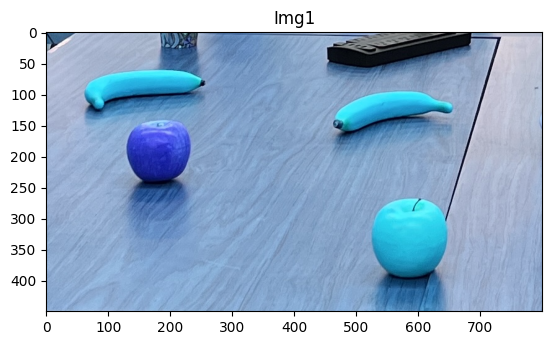

In [6]:


def initilizeImage(imgPath, imgCropStartX, imgCropStartY, imgCropWidth, imgCropHeight):
    # Return cropped image
    return cv2.imread(imgPath)[imgCropStartY:imgCropStartY+imgCropHeight, imgCropStartX:imgCropStartX+imgCropWidth]

img1 = initilizeImage(IMG1_PATH, IMG_CROP_START_X,
                        IMG_CROP_START_Y, IMG_CROP_WIDTH, IMG_CROP_HEIGHT)
img2 = initilizeImage(IMG2_PATH, IMG_CROP_START_X,
                        IMG_CROP_START_Y, IMG_CROP_WIDTH, IMG_CROP_HEIGHT)

# Initial Images
imagesBefore = np.concatenate((img1, img2), axis=1)


# for i in range(9):
#   # displaying the images in a 3 by 3 grid. Default index is 1 hence +1.
#   plt.subplot(3,3,i+1)
#   plt.imshow(digits[i], interpolation="nearest")
#   plt.axis('off') #turn off axis

# plt.show()

# plt.subplot(1,2,1)
plt.imshow(img1)
plt.title('Img1')

# plt.imshow(img2)
# plt.title('Img2')


# f, ax = plt.subplot(2,1)
# ax[0] = plt.imshow(img1)

# plt.subplot(), plt.imshow(img2)
# plt.title('Img2'), plt.xticks([]), plt.yticks([])

plt.show()

In [7]:

def createColorChannels(img):

    #convert the BGR image to HSV colour space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    #set the lower and upper bounds for the green hue
    lower_green = np.array([50,100,50])
    upper_green = np.array([70,255,255])

    #create a mask for green colour using inRange function
    mask = cv2.inRange(hsv, lower_green, upper_green)

    #perform bitwise and on the original image arrays using the mask
    res = cv2.bitwise_and(img, img,mask=mask)

    #create resizable windows for displaying the images
    cv2.namedWindow("res", cv2.WINDOW_NORMAL)
    cv2.namedWindow("hsv", cv2.WINDOW_NORMAL)
    cv2.namedWindow("mask", cv2.WINDOW_NORMAL)

    #display the images
    cv2.imshow("mask", mask)
    cv2.imshow("hsv", hsv)
    cv2.imshow("res", res)

    if cv2.waitKey(0):
        cv2.destroyAllWindows()

In [8]:
# Color
def visualCortexV1():
    pass

In [9]:
# Curves and lines
def detectEdges(img):
    # Convert to graycsale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Blur the image for better edge detection
    img_blur = cv2.GaussianBlur(img_gray, (5,5), 0)
    # Canny Edge Detection. 
    # 5 step process: image smoothening -> finding intensity gradients -> 
    # non-max suppression -> double threshold -> hysteresis edge tracking
    edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)
    return edges

In [10]:
def mse(patch1, patch2):
    """Compute the Mean Squared Error between two image patches."""
    err = np.sum((patch1.astype("float") - patch2.astype("float")) ** 2)
    err /= float(patch1.shape[0] * patch1.shape[1])
    return err

def convolute(img1, img2, kernel_size):
    # Depth
    return find_best_match(img1, img2, kernel_size)


def find_best_match(image1, image2, kernel_size):
    """Find best MSE match for each kernel position in image1 by sliding a kernel in image2."""
    height, width = image1.shape
    match_map = np.zeros((height - kernel_size + 1, width - kernel_size + 1))
    match_locations = []

    for y in range(0, height - kernel_size + 1, KERNEL_SIZE):
        for x1 in range(0, width - kernel_size + 1):
            # print(y, x1, "\n")
            patch1 = image1[y:y + kernel_size, x1:x1 + kernel_size]
            best_mse = float('inf')  # Initialize with a high value for MSE
            best_mse_x2 = 0

            # Only slide kernel if there is an edge
            if np.mean(patch1) != 0:
                for x2 in range(x1, width - kernel_size + 1):
                    patch2 = image2[y:y + kernel_size, x2:x2 + kernel_size]
                    current_mse = mse(patch1, patch2)

                    # Update the best MSE value if the current one is better
                    if current_mse < best_mse:
                        best_mse = current_mse
                        best_mse_x2 = x2

                # Store the best MSE value for this position of the kernel in image1
                match_map[y, x1] = best_mse

                # If MSE is zero (or very close to zero), store the location
                if np.isclose(best_mse, 0, atol=1e-10):
                    match_locations.append((y, x1, best_mse_x2))

    # print position map
    np.set_printoptions(threshold=np.inf)
    match_locations.sort()
    # print(match_locations)

    # Generate position image. Initialize an all-black image
    position_image = np.ones((height, width), dtype=np.uint8) * 255
    prev = -1
    for (y, x1, x2) in match_locations:
        if y == prev:
            continue
        prev = y
        position_image[y, x2] = 0  # Set (y, x2) to white
        position_image[y, x1] = 0  # Set (y, x1) to white

        # Draw a line between (y, x1) and (y, x2)
        cv2.line(position_image, (x1, y), (x2, y), (0, 0, 255), 1)

    cv2.imshow("Position image", position_image)
    cv2.waitKey(0)

    return match_map

In [13]:
# Initial Images
imagesBefore = np.concatenate((img1, img2), axis=1)
cv2.namedWindow('Resized Image', cv2.WINDOW_NORMAL)
cv2.imshow("Initial images", imagesBefore)
cv2.waitKey(0)

1

In [14]:
# createColorChannels(img1)

# Brain process
visualCortexV1()

In [15]:
img1Edges = detectEdges(img1)
img2Edges = detectEdges(img2)
imagesEdges = np.concatenate((img1Edges, img2Edges), axis=1)
cv2.namedWindow('Resized Image', cv2.WINDOW_NORMAL)
cv2.imshow('Canny Edge Detection', imagesEdges)
cv2.waitKey(0)

In [ ]:
match_map = convolute(img1Edges, img2Edges, KERNEL_SIZE)
cv2.imshow('Match Map', match_map)
# print(match_map)
cv2.waitKey(0)
cv2.destroyAllWindows()